## 1. prepare time_clip file for clipping profilling data
        ## run them one by ome: train_mobilenetV3, train_efficientnetV2, train_none, train_resnet152
        ## for files will be generated for step 2


In [2]:
'''
Do before step 2, one time.
Step 1: traverse the raw data, generate the time clip for associating profiling data
'''
import os 
import re
import pandas as pd
root = os.environ['HOME']
date_list,time_start_list,time_end_list,train_type_list =[],[],[],[]
comb_type_list,infer_model_list,co_infer_models_list,file_path_list=[],[],[],[]

folder_train = os.path.join(root,'./Documents/datasets/profile_train_infer/Azure_inference_profiling/train_resnet50')  ## run them one by ome: train_mobilenet, train_efficientnetV2, train_none, train_resnet152
train_type = re.findall(r'.+/(.+)', folder_train)[0]
folders =  os.listdir(folder_train)

data = pd.DataFrame(columns = ['date','time_start','time_end','train_type','combination_type','infer_model','co-infer_models','file_path'])
cnt= 0
for comb_folder in folders: # e.g. models_1_No_Training
    path= os.path.join(folder_train, comb_folder)  #e.g. ./train_none/models_2_No_Training
    if not os.path.isdir(path): continue  # only process with folder, skip profile_Train arch_None20230325.csv
    comb_type = re.findall(r'(models_[0-9]).+',comb_folder)[0]  ## e.g. models_2
    items = os.listdir(path)

    for item in items:
        file_folder = os.path.join(path,item) 
        if os.path.isfile(file_folder):  ## if item here is file name
            file_path = file_folder
            date_list.append(re.findall(r'.+_(.+).csv',item)[0])
            comb_type_list.append('model_1')
            train_type_list.append(train_type)
            infer_model_list.append(re.findall(r'.+\+infer_(.+)_.+.csv',item)[0])
            co_infer_models_list.append('na')
            file_path_list.append(file_path)
            
            ## extract start, end time
            df = pd.read_csv(file_path)
            start, end = df['work_start'].iloc[100], df['work_start'].iloc[-1]  ## 100: take out warmup data
            time_start_list.append(start)
            time_end_list.append(end)
            
            cnt+=1
        else:
            sub_path = os.path.join(path,item)            
            for file in os.listdir(sub_path):  ## sub_path: ./train_none/models_2_No_Training/models_2_resnet50+googlenet/
                file_path = os.path.join(sub_path,file)
                date_list.append(re.findall(r'.+_(.+).csv',file_path)[0])  #e.g. 20230325
                comb_type_list.append(re.findall(r'(models_[0-9]).+',item)[0])  #e.g. models_2
                train_type_list.append(train_type)  #e.g. train_none
                infer_model_list.append(re.findall(r'.+\+infer_(.+)_.+.csv',file_path)[0])  ##e.g.: efficientnet_v2_l
                co_infer_models_list.append(re.findall(r'models_[0-9]_(.+)',item)[0]) ##e.g.: 'googlenet+alexnet'
                file_path_list.append(file_path)
                
                ## extract start, end time
#                 print(file_path)
                try:
                    df = pd.read_csv(file_path)
                    start = df['work_start'].iloc[100] ## 100: take out warmup data
                    end =  df['work_start'].iloc[-1]  

                except:
                    print("File with issues(maybe no record):", file_path)
                    start = df['work_start'].iloc[1] 
                    end =  df['work_start'].iloc[-1] 
                    pass
                
                time_start_list.append(start)
                time_end_list.append(end)
                
                cnt+=1

## ['date','time_start','time_end','train_type','combination_type','infer_model','co-infer_models','file_path']                
data['date']=date_list
data['time_start'] = time_start_list
data['time_end']= time_end_list
data['train_type']= train_type_list
data['combination_type']=comb_type_list
data['infer_model']=infer_model_list
data['co-infer_models']=co_infer_models_list
data['file_path'] = file_path_list
data.to_csv(os.path.join(root,'./Documents/datasets/profile_train_infer/Azure_inference_profiling', ('time_clip_'+train_type+'.csv')), index = False)
print('Total %d files'%cnt)

Total 512 files


In [3]:
data

,date,time_start,time_end,train_type,combination_type,infer_model,co-infer_models,file_path
0,20230413,1.681426e+09,1.681426e+09,train_resnet50,models_2,resnet50,resnet50+googlenet,/home/royliu/./Documents/datasets/profile_trai...
1,20230413,1.681426e+09,1.681426e+09,train_resnet50,models_2,googlenet,resnet50+googlenet,/home/royliu/./Documents/datasets/profile_trai...
2,20230413,1.681424e+09,1.681424e+09,train_resnet50,models_2,mobilenet_v3_small,resnet50+mobilenet_v3_small,/home/royliu/./Documents/datasets/profile_trai...
3,20230413,1.681424e+09,1.681424e+09,train_resnet50,models_2,resnet50,resnet50+mobilenet_v3_small,/home/royliu/./Documents/datasets/profile_trai...
4,20230413,1.681427e+09,1.681428e+09,train_resnet50,models_2,inception_v3,vgg16+inception_v3,/home/royliu/./Documents/datasets/profile_trai...
...,...,...,...,...,...,...,...,...
507,20230414,1.681490e+09,1.681490e+09,train_resnet50,models_4,mobilenet_v3_small,vgg16+mobilenet_v3_small+densenet121+alexnet,/home/royliu/./Documents/datasets/profile_trai...
508,20230414,1.681487e+09,1.681488e+09,train_resnet50,models_4,vgg16,vgg16+mobilenet_v3_small+efficientnet_v2_l+den...,/home/royliu/./Documents/datasets/profile_trai...
509,20230414,1.681487e+09,1.681488e+09,train_resnet50,models_4,densenet121,vgg16+mobilenet_v3_small+efficientnet_v2_l+den...,/home/royliu/./Documents/datasets/profile_trai...
510,20230414,1.681487e+09,1.681488e+09,train_resnet50,models_4,efficientnet_v2_l,vgg16+mobilenet_v3_small+efficientnet_v2_l+den...,/home/royliu/./Documents/datasets/profile_trai...


## 2. Extract prof data by cliping time

### 2.1 check the number of records

In [2]:
### example of checking records of "train_none"
'''
check prof record number
total length of prof records :, e.g. train_none
comb1 profilling record # : 3703
comb2 profilling record # : 25664
comb3 profilling record # : 77359
comb4 profilling record # : 130128

'''
folder = os.path.join(root,'./Documents/datasets/profile_train_infer/Azure_inference_profiling')
train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
train_files = train_none 
file_name1, file_name2 = train_files ## train_mobilenet, train_efficientnet, train_resnet, train_none
data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()
comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()

cols = data_prof.columns
combs = [comb1, comb2, comb3, comb4]
for i, comb in enumerate(combs):
    data_seg = pd.DataFrame(columns= cols)
    l=0
    for idx in range(len(comb)):
        start, end = comb.iloc[idx]['time_start'], comb.iloc[idx]['time_end']
        data_prof_clipped = data_prof.where((data_prof['time_stamp']> start) & (data_prof['time_stamp']< end)).dropna()
#         data_seg=pd.concat([data_seg, data_prof_clipped], axis = 0)
    #     print(len(data_prof_clipped))
        l+= len(data_prof_clipped)
    print(f'comb{i+1} profilling record # : {l}')

comb1 profilling record # : 3703
comb2 profilling record # : 25664
comb3 profilling record # : 77359
comb4 profilling record # : 130128


### 2.2 extract data by comb 

In [4]:
#############V2.  improvement based on v1, narrow the clip to  ############
########  avoid involing some inference time after one of models finishes ######
'''
Train model:  ('time_clip_train_none.csv', './train_none/profile_Train arch_None_20230325.csv')
comb1 profilling record # : 3703
comb2 profilling record # : 12150
comb3 profilling record # : 23989
comb4 profilling record # : 29890
Train model:  ('time_clip_train_mobilenetV3.csv', './train_mobilenetV3/profile_Trainarch_mobilenetV3_20230331.csv')
comb1 profilling record # : 3622
comb2 profilling record # : 11969
comb3 profilling record # : 22539
comb4 profilling record # : 25758
Train model:  ('time_clip_train_resnet50.csv', './train_resnet50/profile_Train arch_resnet50_20230414.csv')
comb1 profilling record # : 3641
comb2 profilling record # : 12030
comb3 profilling record # : 23792
comb4 profilling record # : 29625
Train model:  ('time_clip_train_efficientnetV2.csv', './train_efficientnetV2/profile_Train arch_efficientnetV2_20230403.csv')
comb1 profilling record # : 3657
comb2 profilling record # : 12084
comb3 profilling record # : 23823
comb4 profilling record # : 29272
'''
import os 
import re
import pandas as pd
import numpy as np
root = os.environ['HOME']
folder = os.path.join(root,'./Documents/datasets/profile_train_infer/Azure_inference_profiling')
# train_efficientnet =('time_clip_efficientnetV2.csv', './efficientnetV2/profile_Train arch_efficientnetV2_20230329.csv')
# train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
# train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')

train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
train_resnet = ('time_clip_train_resnet50.csv', './train_resnet50/profile_Train arch_resnet50_20230414.csv')
train_mobilenet =('time_clip_train_mobilenetV3.csv', './train_mobilenetV3/profile_Trainarch_mobilenetV3_20230331.csv')
train_efficientnet =('time_clip_train_efficientnetV2.csv', './train_efficientnetV2/profile_Train arch_efficientnetV2_20230403.csv')


combs_segs = [ 
['none_seg_comb1', 'none_seg_comb2', 'none_seg_comb3', 'none_seg_comb4'],
['mobilenet_seg_comb1','mobilenet_seg_comb2','mobilenet_seg_comb3','mobilenet_seg_comb4'],
['resnet_seg_comb2', 'resnet_seg_comb2', 'resnet_seg_comb3', 'resnet_seg_comb4'],
['effnet_seg_comb1', 'effnet_seg_comb2', 'effnet_seg_comb3', 'effnet_seg_comb4']
]
train_list = [train_none,train_mobilenet, train_resnet, train_efficientnet]

for j, train_files in enumerate(train_list):

    file_name1, file_name2 = train_files ## train_efficientnet, train_resnet, train_none
    data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
    data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
    data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
    cols = data_prof.columns
    comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()  ##e.g. 28 X 2 instances for comb2
    comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
    comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
    comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()
    combs = [comb1, comb2, comb3, comb4]
    # for i in range(4):
    # #     print(combs_segs[1][i])
    #     combs_segs[1][i] = combs[i]   ## data_clip
    print('Train model: ', train_list[j])
    for i, comb in enumerate(combs):  ## iterate comb1 to comb4
        data_seg = pd.DataFrame(columns= cols)
        l=0
        if i == 0: ##comb1
#             items = comb.where(comb['co-infer_models'] == 'model_1').dropna()  ## 8 items
            for idx in range(len(comb)):  ## iterate 8 items
#                 print(item)
                start, end = comb.iloc[idx]['time_start'], comb.iloc[idx]['time_end']
                data_prof_clipped = data_prof.where((data_prof['time_stamp']>= start) & (data_prof['time_stamp']<= end)).dropna()
                data_seg=pd.concat([data_seg, data_prof_clipped], axis = 0)
                combs_segs[j][i] =  data_seg
                l+= len(data_prof_clipped)
        else:    ## comb2, comb3, comb4
            infer_model_comb= np.unique(comb['co-infer_models']) ## e.g. there are 28 combinations in comb_2
            for models in infer_model_comb:            
                items = comb.where(comb['co-infer_models'] == models).dropna()
                start = max(items['time_start'].values)  # find the latest start time
                end = min(items['time_end'].values) # find the earliest end time
                data_prof_clipped = data_prof.where((data_prof['time_stamp']>= start) & (data_prof['time_stamp']<= end)).dropna()
                data_seg=pd.concat([data_seg, data_prof_clipped], axis = 0)
                combs_segs[j][i] =  data_seg
                l+= len(data_prof_clipped)

        print(f'comb{i+1} profilling record # : {l}')

Train model:  ('time_clip_train_none.csv', './train_none/profile_Train arch_None_20230325.csv')
comb1 profilling record # : 3703
comb2 profilling record # : 12150
comb3 profilling record # : 23989
comb4 profilling record # : 29890
Train model:  ('time_clip_train_mobilenetV3.csv', './train_mobilenetV3/profile_Trainarch_mobilenetV3_20230331.csv')
comb1 profilling record # : 3622
comb2 profilling record # : 11969
comb3 profilling record # : 22539
comb4 profilling record # : 25758
Train model:  ('time_clip_train_resnet50.csv', './train_resnet50/profile_Train arch_resnet50_20230414.csv')
comb1 profilling record # : 3641
comb2 profilling record # : 12030
comb3 profilling record # : 23792
comb4 profilling record # : 29625
Train model:  ('time_clip_train_efficientnetV2.csv', './train_efficientnetV2/profile_Train arch_efficientnetV2_20230403.csv')
comb1 profilling record # : 3657
comb2 profilling record # : 12084
comb3 profilling record # : 23823
comb4 profilling record # : 29272


In [20]:
combs_segs = [ 
['none_seg_comb1', 'none_seg_comb2', 'none_seg_comb3', 'none_seg_comb4'],
['resnet_seg_comb2', 'resnet_seg_comb2', 'resnet_seg_comb3', 'resnet_seg_comb4'],
['mobilenet_seg_comb1','mobilenet_seg_comb2','mobilenet_seg_comb3','mobilenet_seg_comb4'],
['effnet_seg_comb1', 'effnet_seg_comb2', 'effnet_seg_comb3', 'effnet_seg_comb4']
]

In [20]:
# #############V1.  This is grab the data all go through the execution time ############
# ######## This may NOT correct, since in concurrent running experiment situtation #####
# ######## some of the inference model stops eliear, so improved to v2 #################
# '''Extract clipped profiling data by train model and combination type (comb1,... comb4)

# output is a 2 dimentinal dataset, as:
#     Train model:  ('time_clip_train_none.csv', './train_none/profile_Train arch_None_20230325.csv')
#     comb1 profilling record # : 3703
#     comb2 profilling record # : 25664
#     comb3 profilling record # : 77359
#     comb4 profilling record # : 130128
#     Train model:  ('time_clip_train_mobilenetV3.csv', './train_mobilenetV3/profile_Trainarch_mobilenetV3_20230331.csv')
#     comb1 profilling record # : 3622
#     comb2 profilling record # : 25313
#     comb3 profilling record # : 125916
#     comb4 profilling record # : 112271
#     Train model:  ('time_clip_train_resnet50.csv', './train_resnet50/profile_Train arch_resnet50_20230414.csv')
#     comb1 profilling record # : 3641
#     comb2 profilling record # : 25438
#     comb3 profilling record # : 76926
#     comb4 profilling record # : 129314
#     Train model:  ('time_clip_train_efficientnetV2.csv', './train_efficientnetV2/profile_Train arch_efficientnetV2_20230403.csv')
#     comb1 profilling record # : 3657
#     comb2 profilling record # : 25532
#     comb3 profilling record # : 77002
#     comb4 profilling record # : 127807

# '''


# import os 
# import re
# import pandas as pd
# root = os.environ['HOME']
# folder = os.path.join(root,'./Documents/datasets/profile_train_infer')
# # train_efficientnet =('time_clip_efficientnetV2.csv', './efficientnetV2/profile_Train arch_efficientnetV2_20230329.csv')
# # train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
# # train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')

# train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
# train_resnet = ('time_clip_train_resnet50.csv', './train_resnet50/profile_Train arch_resnet50_20230414.csv')
# train_mobilenet =('time_clip_train_mobilenetV3.csv', './train_mobilenetV3/profile_Trainarch_mobilenetV3_20230331.csv')
# train_efficientnet =('time_clip_train_efficientnetV2.csv', './train_efficientnetV2/profile_Train arch_efficientnetV2_20230403.csv')


# combs_segs = [ 
# ['none_seg_comb1', 'none_seg_comb2', 'none_seg_comb3', 'none_seg_comb4'],
# ['mobilenet_seg_comb1','mobilenet_seg_comb2','mobilenet_seg_comb3','mobilenet_seg_comb4'],
# ['resnet_seg_comb2', 'resnet_seg_comb2', 'resnet_seg_comb3', 'resnet_seg_comb4'],
# ['effnet_seg_comb1', 'effnet_seg_comb2', 'effnet_seg_comb3', 'effnet_seg_comb4']
# ]
# train_list = [train_none,train_mobilenet, train_resnet, train_efficientnet]

# for j, train_files in enumerate(train_list):

#     file_name1, file_name2 = train_files ## train_efficientnet, train_resnet, train_none
#     data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
#     data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
#     data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
#     cols = data_prof.columns
#     comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()
#     comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
#     comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
#     comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()
#     combs = [comb1, comb2, comb3, comb4]
#     # for i in range(4):
#     # #     print(combs_segs[1][i])
#     #     combs_segs[1][i] = combs[i]   ## data_clip
#     print('Train model: ', train_list[j])
#     for i, comb in enumerate(combs):  ## iterate comb1 to comb4
#         data_seg = pd.DataFrame(columns= cols)
#         l=0
#         for idx in range(len(comb)): ## in specific comb, e.g. comb1
#             start, end = comb.iloc[idx]['time_start'], comb.iloc[idx]['time_end']
#             data_prof_clipped = data_prof.where((data_prof['time_stamp']> start) & (data_prof['time_stamp']< end)).dropna()
#             data_seg=pd.concat([data_seg, data_prof_clipped], axis = 0)
#             combs_segs[j][i] =  data_seg
#         #     print(len(data_prof_clipped))
#             l+= len(data_prof_clipped)
#         print(f'comb{i+1} profilling record # : {l}')

Train model:  ('time_clip_train_none.csv', './train_none/profile_Train arch_None_20230325.csv')
comb1 profilling record # : 3703
comb2 profilling record # : 25664
comb3 profilling record # : 77359
comb4 profilling record # : 130128
Train model:  ('time_clip_train_mobilenetV3.csv', './train_mobilenetV3/profile_Trainarch_mobilenetV3_20230331.csv')
comb1 profilling record # : 3622
comb2 profilling record # : 25313
comb3 profilling record # : 125916
comb4 profilling record # : 112271
Train model:  ('time_clip_train_resnet50.csv', './train_resnet50/profile_Train arch_resnet50_20230414.csv')
comb1 profilling record # : 3641
comb2 profilling record # : 25438
comb3 profilling record # : 76926
comb4 profilling record # : 129314
Train model:  ('time_clip_train_efficientnetV2.csv', './train_efficientnetV2/profile_Train arch_efficientnetV2_20230403.csv')
comb1 profilling record # : 3657
comb2 profilling record # : 25532
comb3 profilling record # : 77002
comb4 profilling record # : 127807


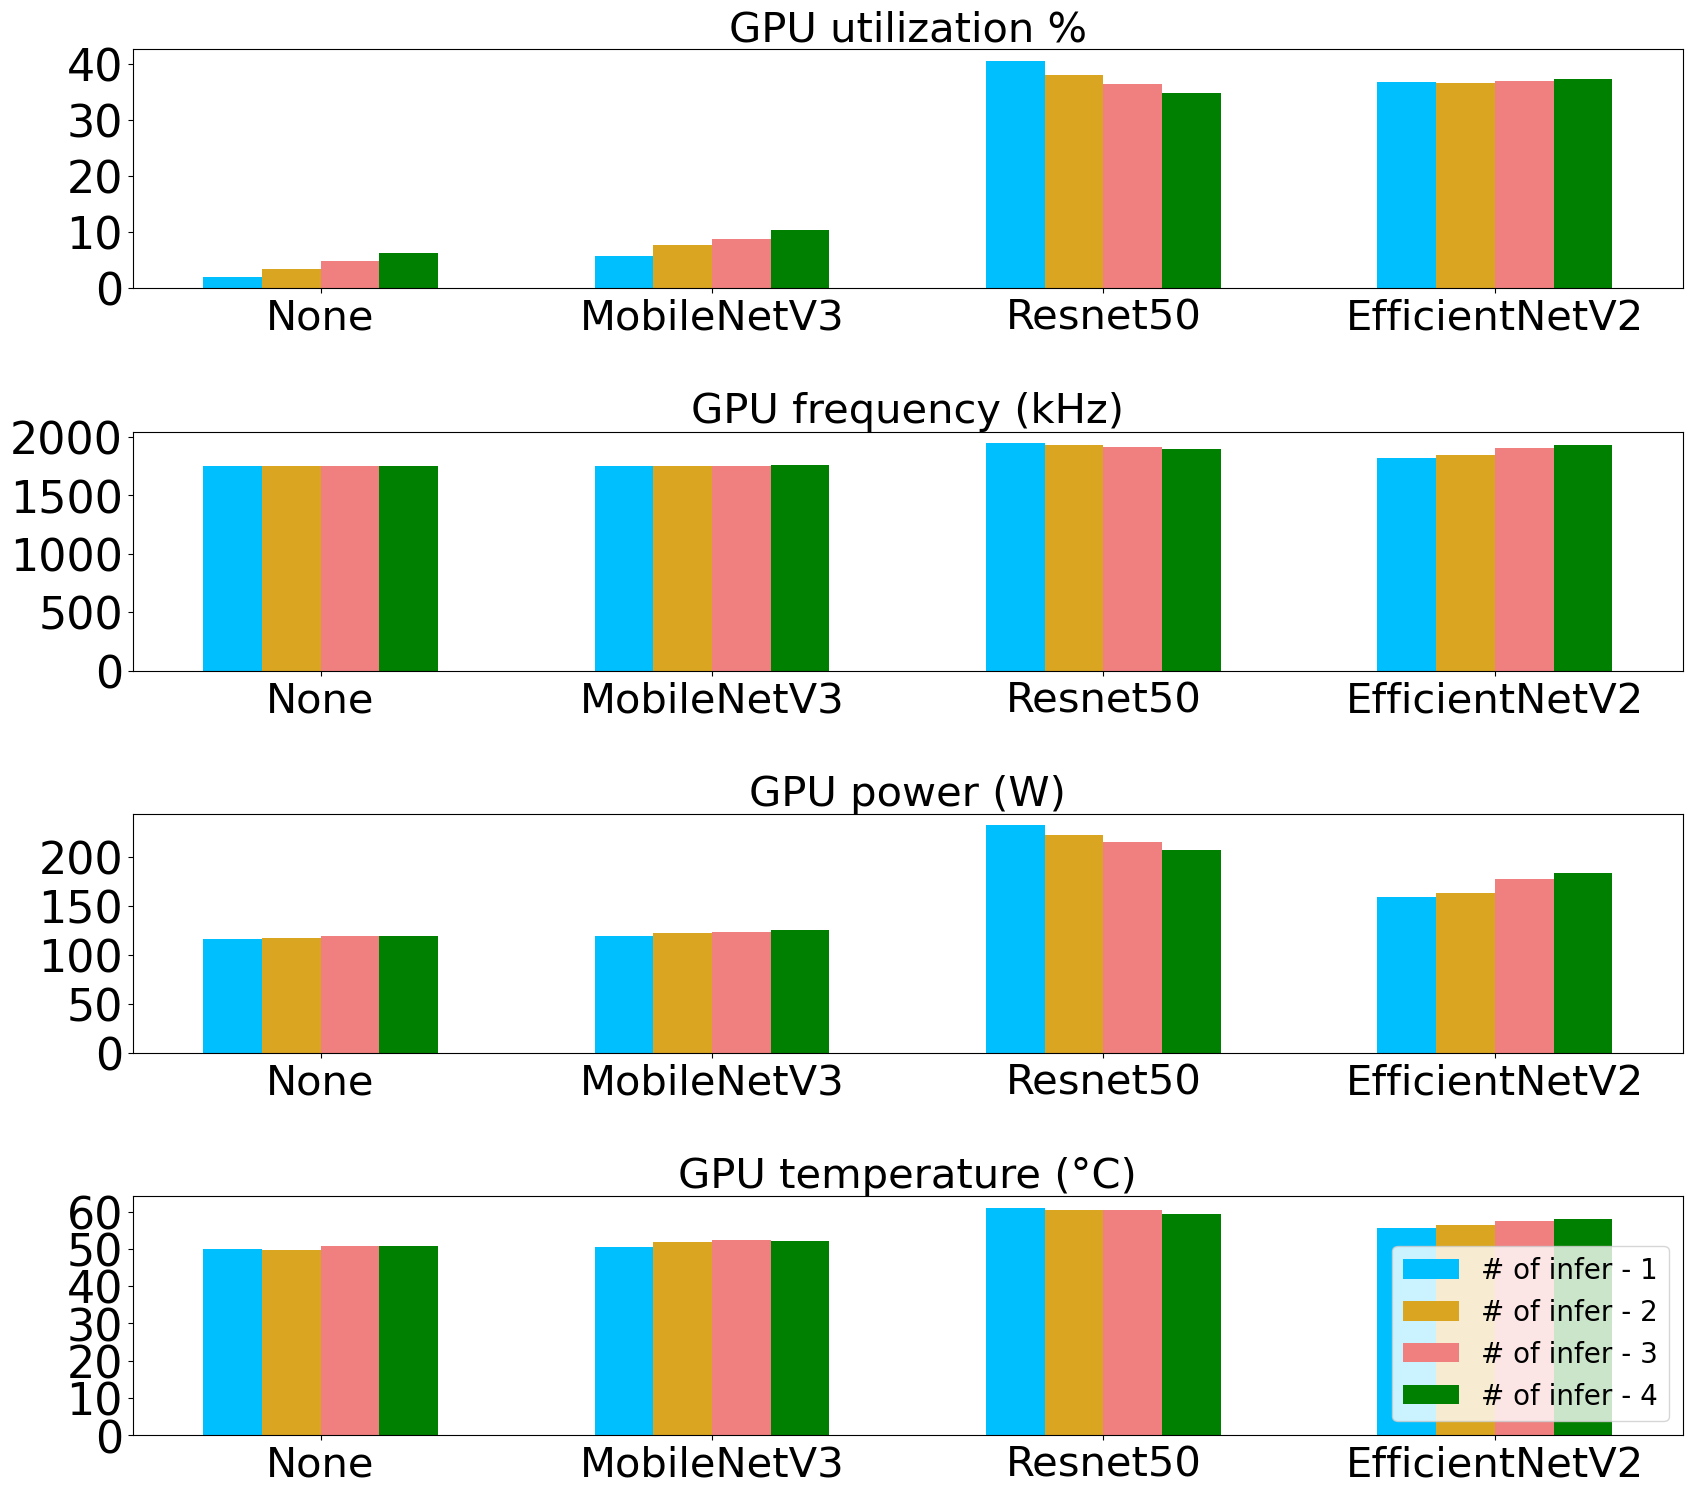

In [12]:
## graph with V2 processing
## combs_segs, by models _concised version

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cols =['gpu_power', 'gpu_freq', 'gpu_mem_freq', 'gpu_temp',
       'gpu_util%', 'gpu_mem_util%']
cols =['gpu_util%','gpu_freq','gpu_power',   'gpu_temp']
colors = ['deepskyblue', 'goldenrod','lightcoral','green']
infer_n =['# of infer - 1','# of infer - 2','# of infer - 3','# of infer - 4']
# title_name = {'gpu_power':'GPU power (W)', 'gpu_freq':'GPU frequency (kHz)','gpu_temp': 'GPU temperature (°C)'}
title_name = {'gpu_util%':'GPU utilization %', 'gpu_freq':'GPU frequency (kHz)','gpu_power':'GPU power (W)','gpu_temp': 'GPU temperature (°C)'}


plot=plt.figure(figsize=(20,18))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.6)
# comb_name_list = ['Comb1','Comb2','Comb3','Comb4',]
train_name_list = ['None','MobileNetV3', 'Resnet50', 'EfficientNetV2']


for k, col in enumerate(cols):
    plt.subplot(4,1,k+1) # e.g 
    for j in range(len(train_list)): ## train list
        value_list = []
        model_names = []
        for i in range(4): ## comb 1 .. comb4
            dt = combs_segs[i][j]
            value = np.mean(dt[col].values)
            value_list.append(value)
#             plt.text(i-j*.2,value,value,fontsize = 6)
        X= np.arange(0,4) # comb 1-- comb4
        pos= 0.1
        if j ==2:  ## this judge is for setting position of xticks
            plt.bar(X+j*.15, value_list, tick_label=train_name_list, width =0.15, color = colors[j], align='edge')
        else:
            plt.bar(X+j*.15, value_list, width =0.15, color = colors[j], align='edge')
        plt.yticks(fontsize= 32, rotation = 0)
        plt.title(title_name[cols[k]], fontsize = 30)
#     if k == len(cols)- 1: ## only print the xlable in the last subfig
#         plt.xlabel('\nTraining models',fontsize = 24)
    plt.xticks(fontsize= 30, rotation = 0)
    if k==3:  ## just show in the last subfigure
        plt.legend(infer_n, loc=4, fontsize = 20)
# plt.legend(infer_n, bbox_to_anchor=(1,0.4))    
# plt.title('GPU profiles when deploy training and multiple inferences co-running, by models', fontsize= 10)

plt.savefig('../paper/images/profile.pdf',dpi=600, bbox_inches='tight')

In [76]:
combs_segs[3][3] 

,time_stamp,gpu_power,gpu_freq,gpu_mem_freq,gpu_temp,gpu_util%,gpu_mem_util%
247536,1.680650e+09,191.12,1965.0,9251.0,58.0,37.0,11.0
247537,1.680650e+09,193.08,1965.0,9251.0,58.0,40.0,12.0
247538,1.680650e+09,193.18,1965.0,9251.0,58.0,38.0,11.0
247539,1.680650e+09,193.18,1965.0,9251.0,58.0,39.0,12.0
247540,1.680650e+09,186.82,1905.0,9251.0,58.0,35.0,10.0
...,...,...,...,...,...,...,...
230694,1.680633e+09,188.19,1845.0,9251.0,57.0,35.0,12.0
230695,1.680633e+09,160.02,1800.0,9251.0,57.0,38.0,11.0
230696,1.680633e+09,159.65,1830.0,9251.0,56.0,38.0,12.0
230697,1.680633e+09,175.66,1950.0,9251.0,58.0,38.0,13.0


In [23]:
## take a look at extracted data:
# print(combs_segs)
combs_segs[3][0]  ##e.g. efficientNet, comb1

,time_stamp,gpu_power,gpu_freq,gpu_mem_freq,gpu_temp,gpu_util%,gpu_mem_util%
85,1.680042e+09,145.60,1755.0,9251.0,53.0,35.0,9.0
86,1.680042e+09,147.26,1770.0,9251.0,53.0,34.0,9.0
87,1.680042e+09,148.68,1755.0,9251.0,53.0,34.0,9.0
88,1.680042e+09,147.05,1755.0,9251.0,53.0,33.0,9.0
89,1.680042e+09,147.03,1755.0,9251.0,53.0,35.0,11.0
...,...,...,...,...,...,...,...
3874,1.680045e+09,149.00,1770.0,9251.0,55.0,39.0,10.0
3875,1.680045e+09,149.22,1755.0,9251.0,55.0,35.0,9.0
3876,1.680045e+09,147.92,1755.0,9251.0,55.0,37.0,9.0
3877,1.680045e+09,148.37,1755.0,9251.0,55.0,39.0,10.0


## 3 plotting

In [6]:
cnames = {'aliceblue': '#F0F8FF','antiquewhite': '#FAEBD7','aqua': '#00FFFF','aquamarine': '#7FFFD4','azure': '#F0FFFF','beige': '#F5F5DC','bisque': '#FFE4C4','black': '#000000','blanchedalmond': '#FFEBCD','blue': '#0000FF','blueviolet': '#8A2BE2','brown': '#A52A2A','burlywood': '#DEB887','cadetblue': '#5F9EA0','chartreuse': '#7FFF00','chocolate': '#D2691E','coral': '#FF7F50','cornflowerblue': '#6495ED','cornsilk': '#FFF8DC','crimson': '#DC143C','cyan': '#00FFFF','darkblue': '#00008B','darkcyan': '#008B8B','darkgoldenrod': '#B8860B','darkgray': '#A9A9A9','darkgreen': '#006400','darkkhaki': '#BDB76B','darkmagenta': '#8B008B','darkolivegreen': '#556B2F','darkorange': '#FF8C00','darkorchid': '#9932CC','darkred': '#8B0000','darksalmon': '#E9967A','darkseagreen': '#8FBC8F','darkslateblue': '#483D8B','darkslategray': '#2F4F4F','darkturquoise': '#00CED1','darkviolet': '#9400D3','deeppink': '#FF1493','deepskyblue': '#00BFFF','dimgray': '#696969','dodgerblue': '#1E90FF','firebrick': '#B22222','floralwhite': '#FFFAF0','forestgreen': '#228B22','fuchsia': '#FF00FF','gainsboro': '#DCDCDC','ghostwhite': '#F8F8FF','gold': '#FFD700','goldenrod': '#DAA520','gray': '#808080','green': '#008000','greenyellow': '#ADFF2F','honeydew': '#F0FFF0','hotpink': '#FF69B4','indianred': '#CD5C5C','indigo': '#4B0082','ivory': '#FFFFF0','khaki': '#F0E68C','lavender': '#E6E6FA','lavenderblush': '#FFF0F5','lawngreen': '#7CFC00','lemonchiffon': '#FFFACD','lightblue': '#ADD8E6','lightcoral': '#F08080','lightcyan': '#E0FFFF','lightgoldenrodyellow': '#FAFAD2','lightgreen': '#90EE90','lightgray': '#D3D3D3','lightpink': '#FFB6C1','lightsalmon': '#FFA07A','lightseagreen': '#20B2AA','lightskyblue': '#87CEFA','lightslategray': '#778899','lightsteelblue': '#B0C4DE','lightyellow': '#FFFFE0','lime': '#00FF00','limegreen': '#32CD32','linen': '#FAF0E6','magenta': '#FF00FF','maroon': '#800000','mediumaquamarine': '#66CDAA','mediumblue': '#0000CD','mediumorchid': '#BA55D3','mediumpurple': '#9370DB','mediumseagreen': '#3CB371','mediumslateblue': '#7B68EE','mediumspringgreen': '#00FA9A','mediumturquoise': '#48D1CC','mediumvioletred': '#C71585','midnightblue': '#191970','mintcream': '#F5FFFA','mistyrose': '#FFE4E1','moccasin': '#FFE4B5','navajowhite': '#FFDEAD','navy': '#000080','oldlace': '#FDF5E6','olive': '#808000','olivedrab': '#6B8E23','orange': '#FFA500','orangered': '#FF4500','orchid': '#DA70D6','palegoldenrod': '#EEE8AA','palegreen': '#98FB98','paleturquoise': '#AFEEEE','palevioletred': '#DB7093','papayawhip': '#FFEFD5','peachpuff': '#FFDAB9','peru': '#CD853F','pink': '#FFC0CB','plum': '#DDA0DD','powderblue': '#B0E0E6','purple': '#800080','red': '#FF0000','rosybrown': '#BC8F8F','royalblue': '#4169E1','saddlebrown': '#8B4513','salmon': '#FA8072','sandybrown': '#FAA460','seagreen': '#2E8B57','seashell': '#FFF5EE','sienna': '#A0522D','silver': '#C0C0C0','skyblue': '#87CEEB','slateblue': '#6A5ACD','slategray': '#708090','snow': '#FFFAFA','springgreen': '#00FF7F','steelblue': '#4682B4','tan': '#D2B48C','teal': '#008080','thistle': '#D8BFD8','tomato': '#FF6347','turquoise': '#40E0D0','violet': '#EE82EE','wheat': '#F5DEB3','white': '#FFFFFF','whitesmoke': '#F5F5F5','yellow': '#FFFF00','yellowgreen': '#9ACD32'}

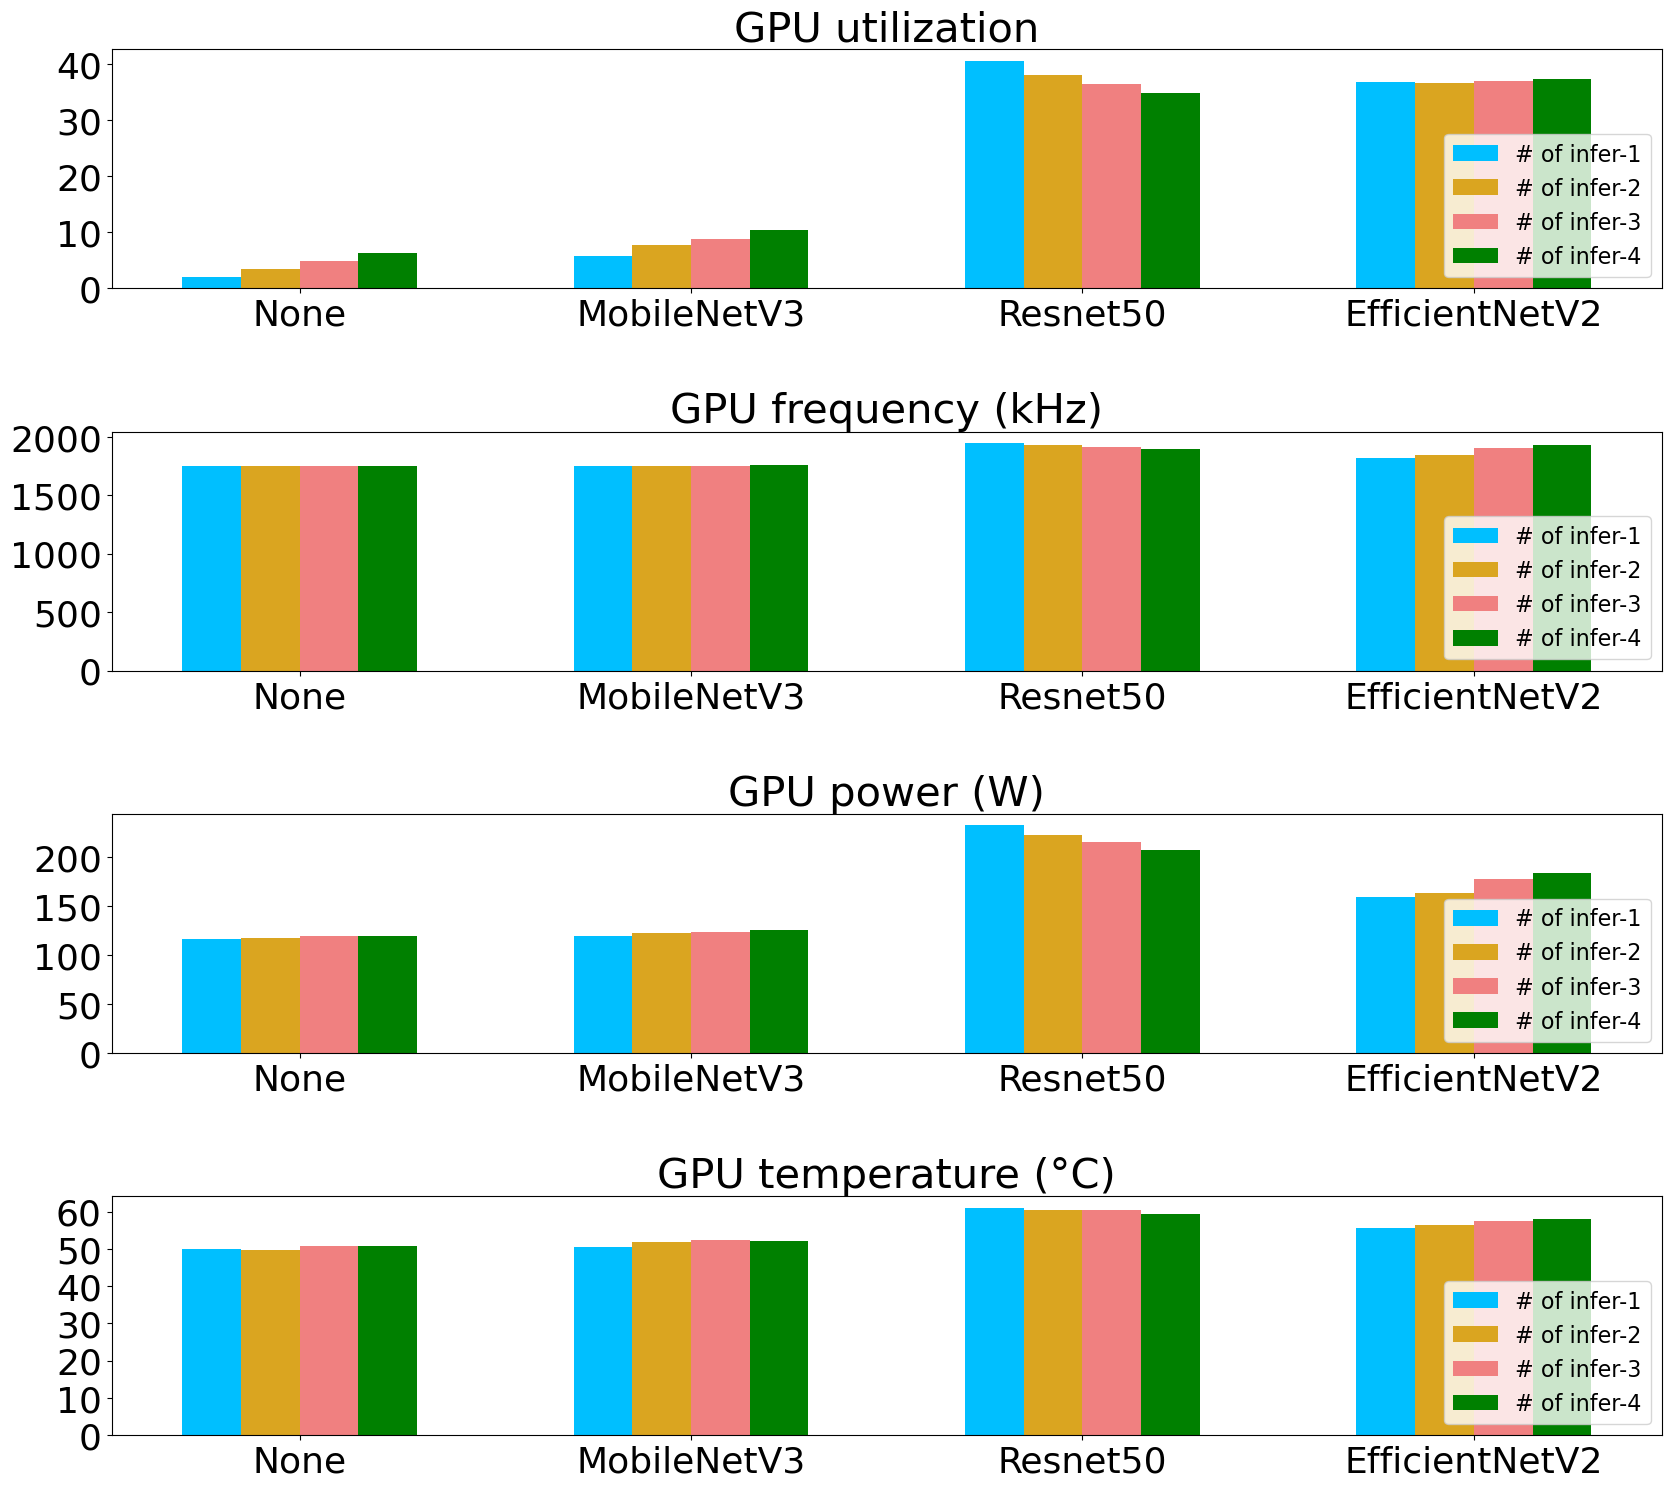

In [85]:
## Graph with V1 processing
## combs_segs, by models _concised version

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cols =['gpu_power', 'gpu_freq', 'gpu_mem_freq', 'gpu_temp',
       'gpu_util%', 'gpu_mem_util%']
cols =['gpu_util%','gpu_freq','gpu_power',   'gpu_temp']
colors = ['deepskyblue', 'goldenrod','lightcoral','green']
infer_n =['# of infer-1','# of infer-2','# of infer-3','# of infer-4']
# title_name = {'gpu_power':'GPU power (W)', 'gpu_freq':'GPU frequency (kHz)','gpu_temp': 'GPU temperature (°C)'}
title_name = {'gpu_util%':'GPU utilization', 'gpu_freq':'GPU frequency (kHz)','gpu_power':'GPU power (W)','gpu_temp': 'GPU temperature (°C)'}


plot=plt.figure(figsize=(20,18))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.6)
# comb_name_list = ['Comb1','Comb2','Comb3','Comb4',]
train_name_list = ['None','MobileNetV3', 'Resnet50', 'EfficientNetV2']


for k, col in enumerate(cols):
    plt.subplot(4,1,k+1) # e.g 
    for j in range(len(train_list)): ## train list
        value_list = []
        model_names = []
        for i in range(4): ## comb 1 .. comb4
            dt = combs_segs[i][j]
#             value = np.median(dt[col].values)
            value = np.mean(dt[col].values)
            value_list.append(value)
#             plt.text(i-j*.2,value,value,fontsize = 6)
        X= np.arange(0,4) # comb 1-- comb4
        pos= 0.1
        if j ==2:  ## this judge is for setting position of xticks
            plt.bar(X+j*.15, value_list, tick_label=train_name_list, width =0.15, color = colors[j], align='edge')
        else:
            plt.bar(X+j*.15, value_list, width =0.15, color = colors[j], align='edge')
        plt.yticks(fontsize= 26, rotation = 0)
        plt.title(title_name[cols[k]], fontsize = 30)
#     if k == len(cols)- 1: ## only print the xlable in the last subfig
#         plt.xlabel('\nTraining models',fontsize = 24)
    plt.xticks(fontsize= 26, rotation = 0)
    plt.legend(infer_n, loc=4, fontsize = 16)
# plt.legend(infer_n, bbox_to_anchor=(1,0.4))    
# plt.title('GPU profiles when deploy training and multiple inferences co-running, by models', fontsize= 10)

plt.savefig('../paper/images/profile.pdf',dpi=600, bbox_inches='tight')

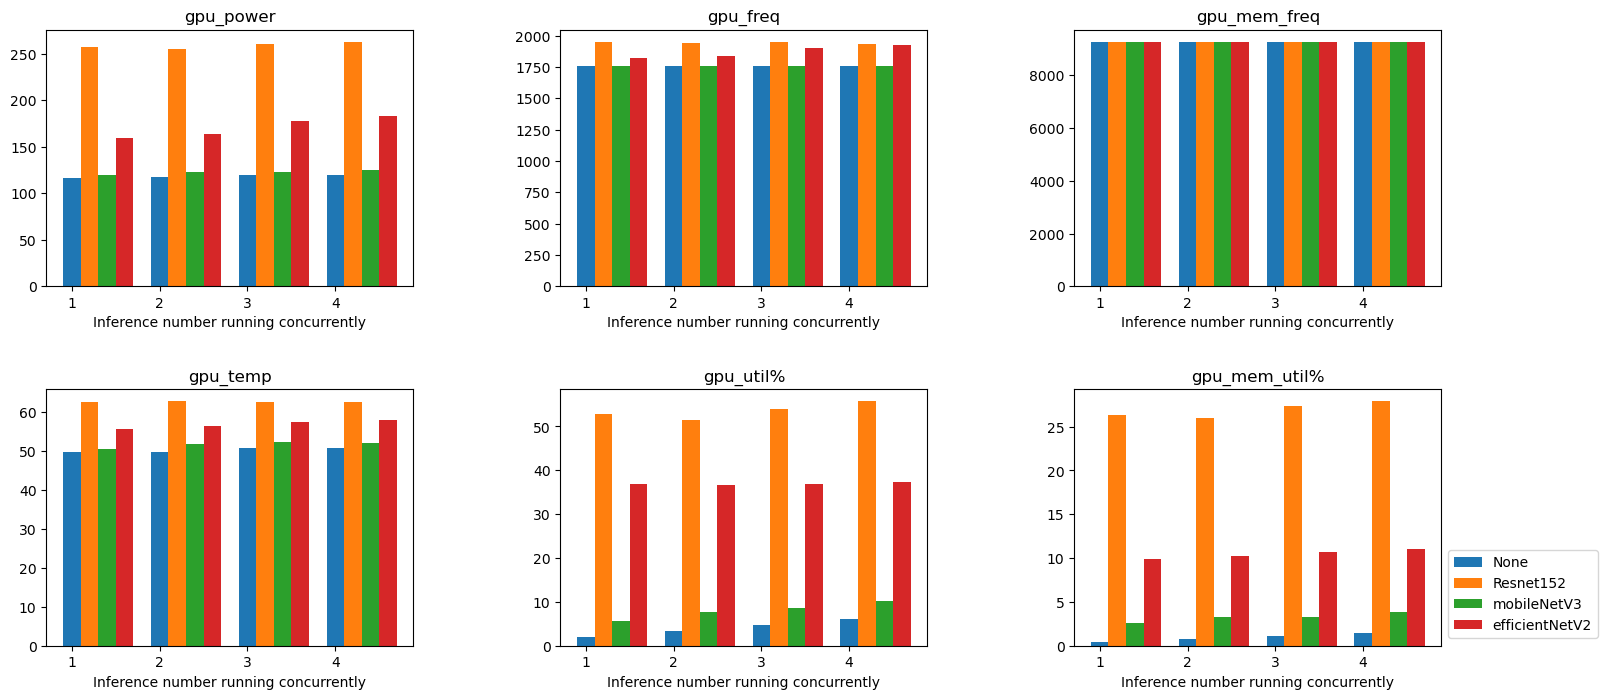

In [15]:
## combs_segs, by inference numbers

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cols =['gpu_power', 'gpu_freq', 'gpu_mem_freq', 'gpu_temp',
       'gpu_util%', 'gpu_mem_util%']
plot=plt.figure(figsize=(18,8))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.4)
# comb_name_list = ['Comb1','Comb2','Comb3','Comb4',]
train_name_list = ['None', 'Resnet152', 'mobileNetV3','efficientNetV2']

for k, col in enumerate(cols):
    plt.subplot(2,3,k+1) # e.g 
    for j in range(len(train_list )):
        value_list = []
        for i in range(4): ## comb 1 .. comb4
            dt = combs_segs[j][i]
            value = np.mean(dt[col].values)
            value_list.append(value)
        X= np.arange(1,5) # comb 1-- comb4
        pos= 0.4
        plt.bar(X+j*.2, value_list, width =0.2, label = col)
            
    plt.xlabel('Inference number running concurrently', fontsize= 10)
    plt.title(cols[k])
plt.legend(train_name_list, bbox_to_anchor=(1,0.4))

# plt.savefig('./profile.pdf')

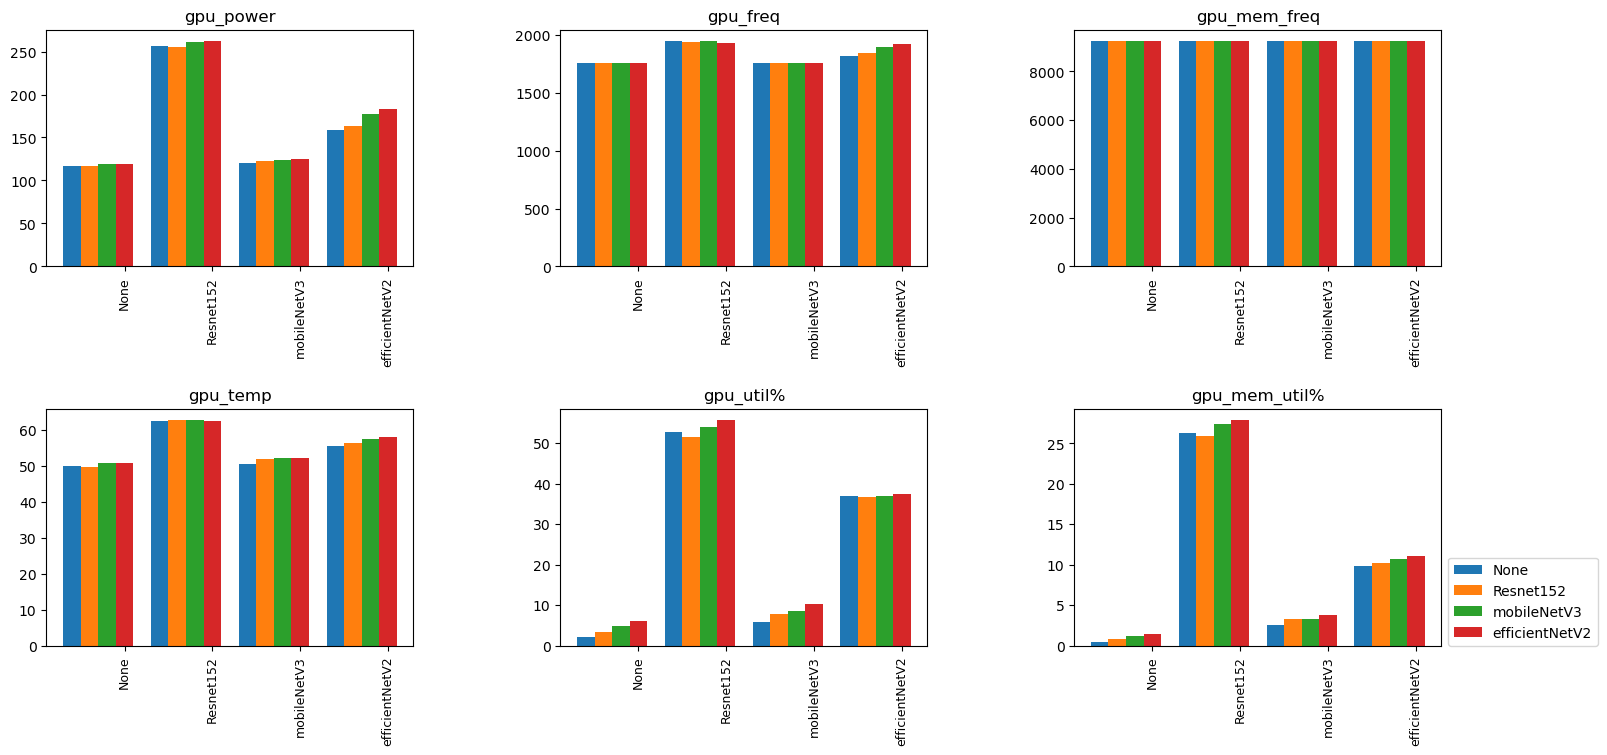

In [16]:
## combs_segs, by models

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cols =['gpu_power', 'gpu_freq', 'gpu_mem_freq', 'gpu_temp',
       'gpu_util%', 'gpu_mem_util%']
infer_n =['# of infer-1','# of infer-2','# of infer-3','# of infer-4']
plot=plt.figure(figsize=(18,8))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.6)
# comb_name_list = ['Comb1','Comb2','Comb3','Comb4',]
train_name_list = ['None', 'Resnet152', 'mobileNetV3','efficientNetV2']

for k, col in enumerate(cols):
    plt.subplot(2,3,k+1) # e.g 
    for j in range(len(train_list)): ## train list
        value_list = []
        model_names = []
        for i in range(4): ## comb 1 .. comb4
            dt = combs_segs[i][j]
            value = np.mean(dt[col].values)
            value_list.append(value)
#             plt.text(i-j*.2,value,value,fontsize = 6)
        X= np.arange(0,4) # comb 1-- comb4
        pos= 0.1
        plt.bar(X+j*.2, value_list, tick_label=train_name_list, width =0.2)
        plt.xticks(fontsize= 9, rotation = 90)
        plt.title(cols[k])
# plt.legend(infer_n, loc=1)
plt.legend(train_name_list, bbox_to_anchor=(1,0.4))    
# plt.title('GPU profiles when deploy training and multiple inferences co-running, by models', fontsize= 10)

# plt.savefig('./profile.pdf')

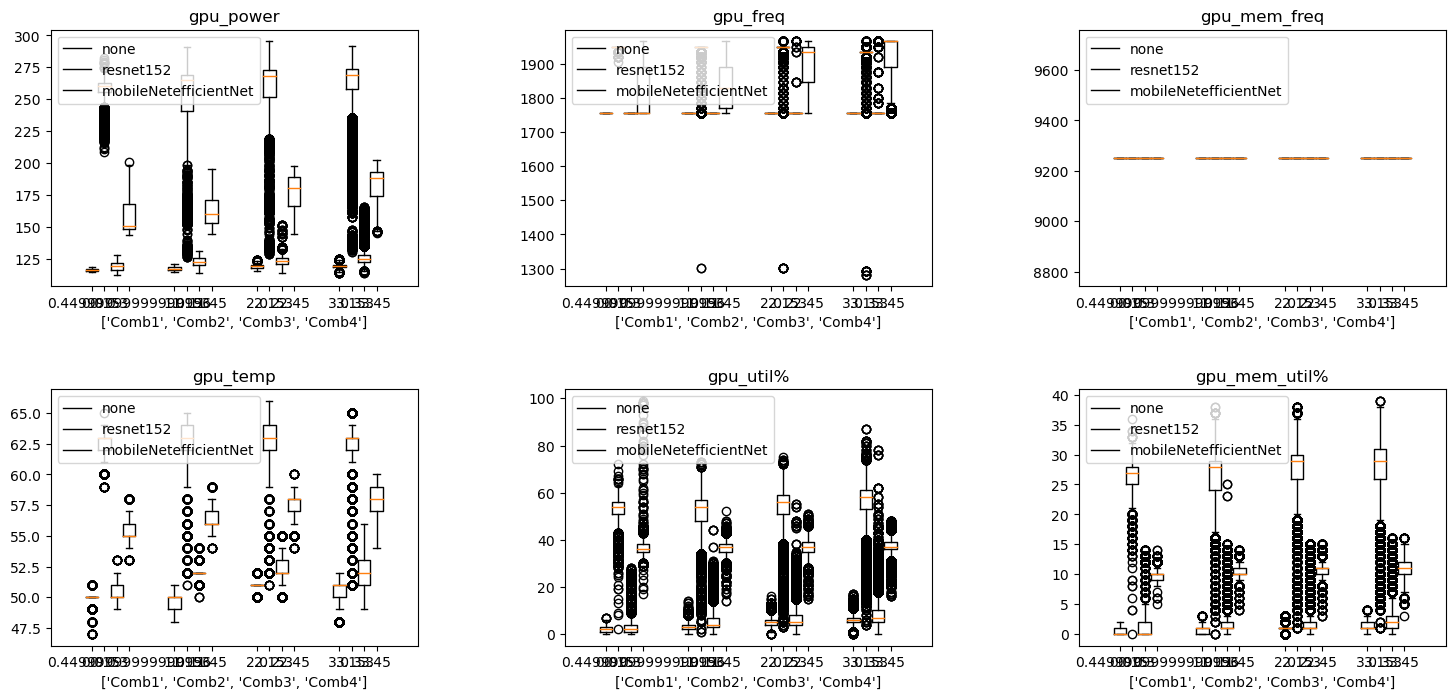

In [17]:
## combs_segs
import numpy as np
import matplotlib.pyplot as plt
cols =['gpu_power', 'gpu_freq', 'gpu_mem_freq', 'gpu_temp',
       'gpu_util%', 'gpu_mem_util%']
plot=plt.figure(figsize=(18,8))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.4)
comb_name_list = ['Comb1','Comb2','Comb3','Comb4',]
train_name_list = ['none', 'resnet152', 'mobileNet''efficientNet']

for k, col in enumerate(cols):
    plt.subplot(2,3,k+1) # e.g 
    for j in range(len(train_list )):
        value_list = []
        for i in range(4): ## comb 1 .. comb4
            dt = combs_segs[j][i]
            value = np.mean(dt[col].values)
            value_list.append(value)
            plt.boxplot(dt[col].values, widths =0.15, positions = [i+j*.15])
        X= np.arange(4) # comb 1-- comb4
        pos= 0.4
    plt.xlabel(comb_name_list, fontsize= 10)
    plt.title(cols[k])
#     plt.ylabel(cols[k], fontsize= 15) 
    plt.legend(train_name_list, loc=2)
    #         print(value)

## backup


In [31]:
import os 
import re
import pandas as pd
root = os.environ['HOME']
folder = os.path.join(root,'./Documents/datasets/profile_train_infer/Azure_inference_profiling')
train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')
train_mobilenet =('time_clip_mobilenet.csv', './train_mobilenet/profile_Trainarch_mobilenet_20230331.csv')
train_efficientnet =('time_clip_efficientnetV2.csv', './train_efficientnetV2/profile_Train arch_efficientnetV2_20230403.csv')

# train_files = train_resnet 
# file_name1, file_name2 = train_files ## train_efficientnet, train_resnet, train_none
# data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
# data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
# data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
# comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()
# comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
# comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
# comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()

In [ ]:
## resnet:
import os 
import re
import pandas as pd
root = os.environ['HOME']
folder = os.path.join(root,'./Documents/datasets/profile_train_infer')
train_efficientnet =('time_clip_efficientnetV2.csv', './efficientnetV2/profile_Train arch_efficientnetV2_20230329.csv')
train_none = ('time_clip_train_none.csv','./train_none/profile_Train arch_None_20230325.csv')
train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')


folder_train = os.path.join(root,'./Documents/datasets/profile_train_infer/train_none')  ## efficientnetV2, train_none, train_resnet152
train_type = re.findall(r'.+/(.+)', folder_train)[0]
folders =  os.listdir(folder_train)

combs_segs = [ 
['none_seg_comb1', 'none_seg_comb2', 'none_seg_comb3', 'none_seg_comb4'],
['resnet_seg_comb2', 'resnet_seg_comb2', 'resnet_seg_comb3', 'resnet_seg_comb4'],
['effnet_seg_comb1', 'effnet_seg_comb2', 'effnet_seg_comb3', 'effnet_seg_comb4'],
['mobilenet_seg_comb1','mobilenet_seg_comb2','mobilenet_seg_comb3','mobilenet_seg_comb4']
]


train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')

train_files = train_resnet 
file_name1, file_name2 = train_files ## train_efficientnet, train_resnet, train_none
data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
cols = data_prof.columns
comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()
comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()
combs = [comb1, comb2, comb3, comb4]
# for i in range(4):
# #     print(combs_segs[1][i])
#     combs_segs[1][i] = combs[i]   ## data_clip

for i, comb in enumerate(combs):  ## iterate comb1 to comb4
    data_seg = pd.DataFrame(columns= cols)
    l=0
    for idx in range(len(comb)): ## in specific comb, e.g. comb1
        start, end = comb.iloc[idx]['time_start'], comb.iloc[idx]['time_end']
        data_prof_clipped = data_prof.where((data_prof['time_stamp']> start) & (data_prof['time_stamp']< end)).dropna()
        data_seg=pd.concat([data_seg, data_prof_clipped], axis = 0)
        combs_segs[1][i] =  data_seg
    #     print(len(data_prof_clipped))
        l+= len(data_prof_clipped)
    print(f'comb{i+1} profilling record # : {l}')

In [32]:
### v1. train_resnet152
train_resnet = ('time_clip_train_resnet152.csv', './train_resnet152/profile_Train arch_resnet152_20230327.csv')

train_files = train_resnet 
file_name1, file_name2 = train_files ## train_efficientnet, train_resnet, train_none
data_clip= pd.read_csv(os.path.join(folder,file_name1), index_col= None)
data_prof= pd.read_csv(os.path.join(folder,file_name2), index_col= None)
data_prof = data_prof[['time_stamp','gpu_power','gpu_freq','gpu_mem_freq','gpu_temp','gpu_util%','gpu_mem_util%']]
comb1 = data_clip.where(data_clip['combination_type']== 'model_1').dropna()
comb2 = data_clip.where(data_clip['combination_type']== 'models_2').dropna()
comb3 = data_clip.where(data_clip['combination_type']== 'models_3').dropna()
comb4 = data_clip.where(data_clip['combination_type']== 'models_4').dropna()

'''
check prof record number:
comb1 profilling record # : 3627
comb2 profilling record # : 25395
comb3 profilling record # : 76523
comb4 profilling record # : 92878

'''

cols = data_prof.columns
combs = [comb1, comb2, comb3, comb4]
for i, comb in enumerate(combs):
    data_seg = pd.DataFrame(columns= cols)
    l=0
    for idx in range(len(comb)):
        start, end = comb.iloc[idx]['time_start'], comb.iloc[idx]['time_end']
        data_prof_clipped = data_prof.where((data_prof['time_stamp']> start) & (data_prof['time_stamp']< end)).dropna()
#         data_seg=pd.concat([data_seg, data_prof_clipped], axis = 0)
    #     print(len(data_prof_clipped))
        l+= len(data_prof_clipped)
    print(f'comb{i+1} profilling record # : {l}')

comb1 profilling record # : 3627
comb2 profilling record # : 25395
comb3 profilling record # : 76523
comb4 profilling record # : 92878


In [31]:
c.shape

(88053,)

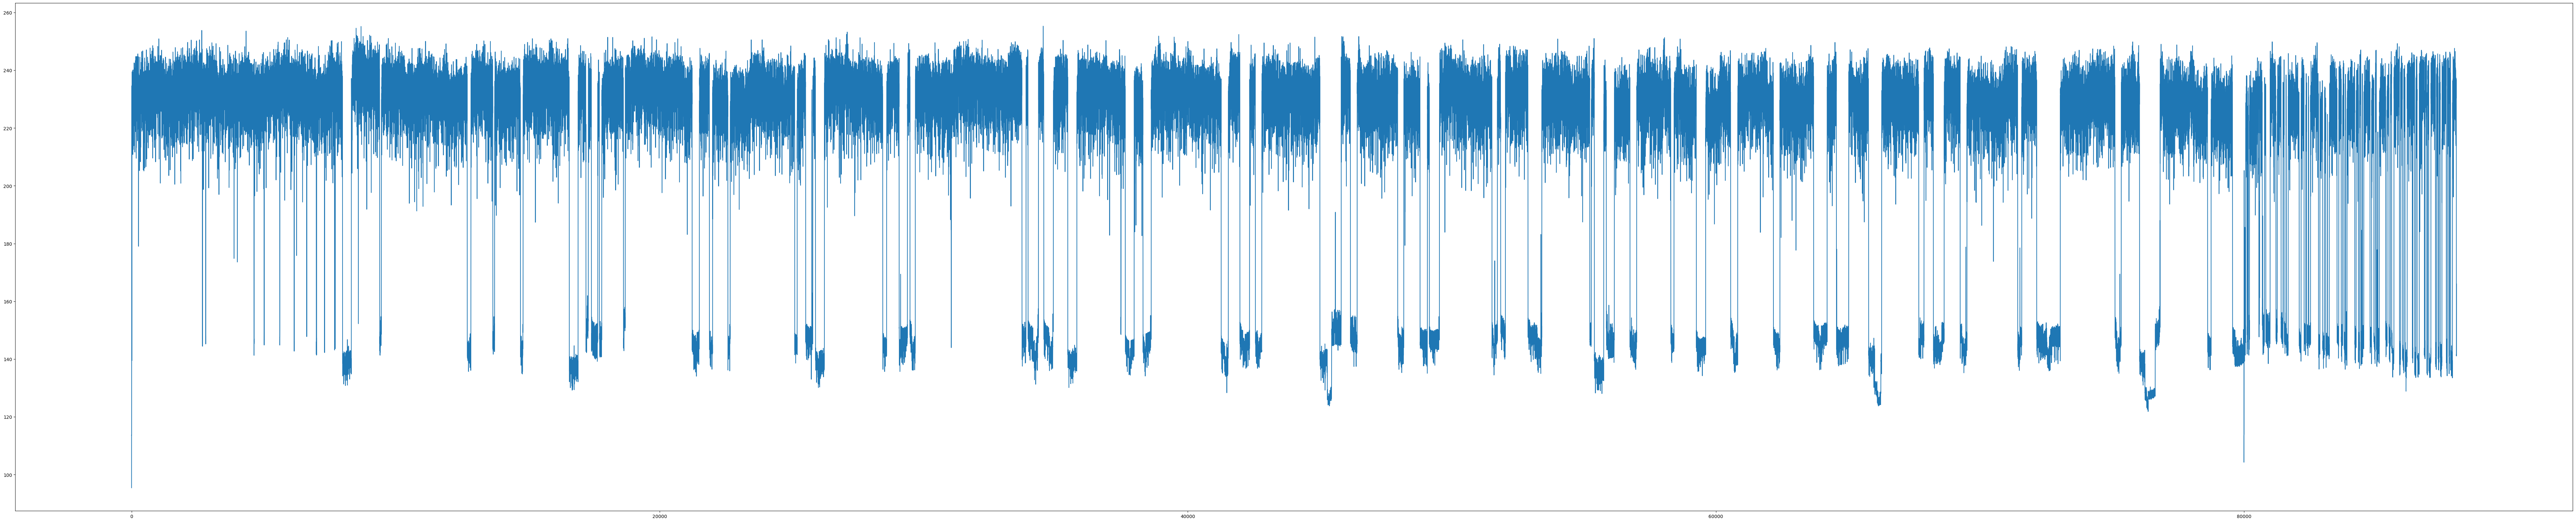

In [40]:
## v1
plt.figure(figsize=(100,20))
dd ='/home/royliu/Documents/datasets/profile_train_infer/train_resnet50/profile_Train arch_resnet50_20230414.csv'
d= pd.read_csv(dd, index_col =None)
c= d['gpu_power'].values
plt.plot(c)

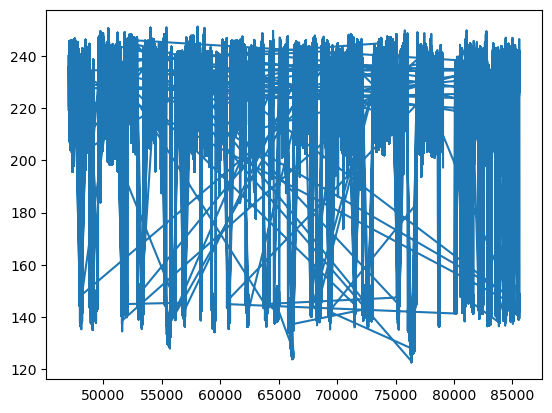

In [50]:
## with V1 data
e=combs_segs[2][3]['gpu_power']
plt.plot(e)

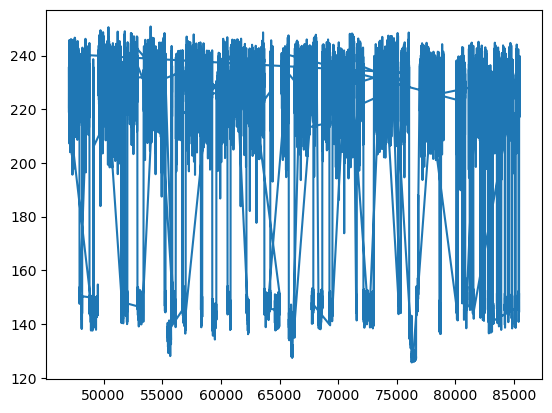

In [80]:
## with V2 data
e=combs_segs[2][3]['gpu_power']
plt.plot(e)